/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


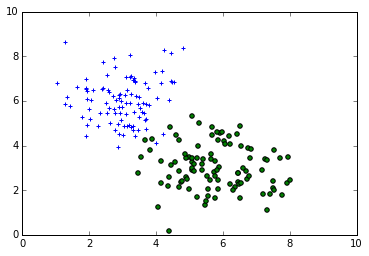

In [1]:
import theano
import theano.tensor as T
import theano.tensor.nnet as NN
#three most useful packages in theano

import numpy as NP
import numpy.random as RNG
%matplotlib inline
import matplotlib.pyplot as plt
dot_num = 100
x_p = NP.random.normal(3., 1, dot_num)
y_p = NP.random.normal(6., 1, dot_num)
label_p = NP.ones(dot_num)

x_n = NP.random.normal(6., 1, dot_num)
y_n = NP.random.normal(3., 1, dot_num)
label_n = NP.zeros(dot_num)

X_p = NP.stack([x_p,y_p]).transpose(1,0)
X_n = NP.stack([x_n,y_n]).transpose(1,0)
X_data = NP.concatenate([X_p,X_n])
y_data = NP.concatenate([label_p,label_n])

plt.scatter(X_p[:,0], X_p[:,1], c='b', marker='+')
plt.scatter(X_n[:,0], X_n[:,1], c='g', marker='o')
plt.xlim(0,10)
plt.ylim(0,10)
def shuffle(x,y):
    p = RNG.permutation(len(x))
    return x[p], y[p]

X_data, y_data = shuffle(X_data, y_data)

In [2]:
lr = 1e-2 #learning rate

#define inputs
x=T.matrix()
labels=T.vector()

#define parameters
W=theano.shared(RNG.uniform(-0.05, 0.05, size=(2,1)))
b=theano.shared(NP.zeros((1,)))
params = [W, b]

#build the equation 
y_hat = NN.sigmoid(T.dot(x, W)+b)

#define the loss
loss = T.mean(NN.binary_crossentropy(y_hat,labels[:,None]))

#calculate the gradient 
grads = theano.grad(loss, params)

#gradient descent 
param_update = []
for p,g in zip(params, grads):
    param_update.append((p, p-lr*g))
    
#compile the theano function
train_func = theano.function([x, labels], [loss, y_hat], updates=param_update, allow_input_downcast=True)
print 'COMPILE DONE'

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


COMPILE DONE


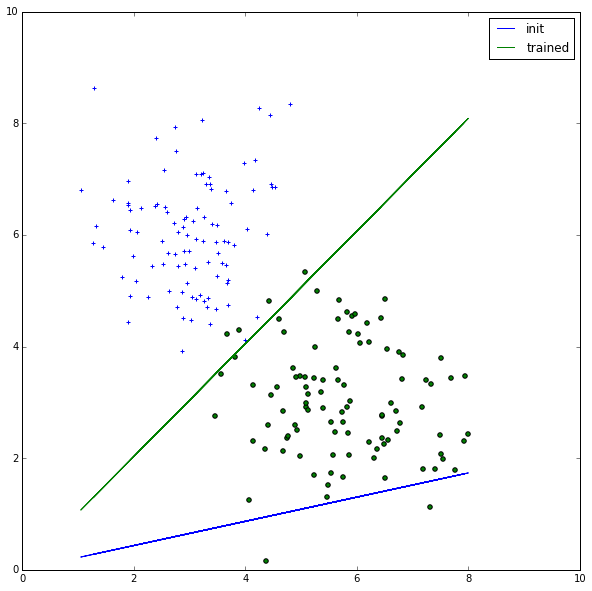

In [3]:
print_flag = False #if you want details of trainning, just enable this flag
fig = plt.figure(figsize=(10,10))
plt.scatter(X_p[:,0], X_p[:,1], c='b', marker='+')
plt.scatter(X_n[:,0], X_n[:,1], c='g', marker='o')

for i in xrange(50):
    cost, n_out = train_func(X_data, y_data)
    if i==0:
        plt.plot(X_data[:,0], -1.0*b.get_value()-1.0*W.get_value()[0]/W.get_value()[1]*X_data[:,0])
    if print_flag:
        print 'loss={0:.4f}\tW={1:.4f};{2:.4f}   \tb={3:.4f}'.format(cost.tolist(), W.get_value()[0][0], W.get_value()[1][0], b.get_value()[0])

plt.plot(X_data[:,0], -1.0*b.get_value()-1.0*W.get_value()[0]/W.get_value()[1]*X_data[:,0])
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(['init', 'trained'])